# Predicting Heart Disease using ML

This notebook uses various Python-based ML and Data Science Libraries in an attempt to build a machine learning model which is capable of telling whether someone has heart disease or not based on their medical reports.

Our approach involves the following steps:
1. Problem
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem

In a statement,
> Given the medical reports of a patient, can we predict whether they have heart disease?

## 2. Data

The data is from the Cleavland Database, taken from the UCI Machine Learning repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

The data is also available on kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we are able to achieve 95% accuracy at predicting whether a patient has the heart disease or not during the proof of concept, we'll pursue the project

## 4. Features

Information about each feature in data

**Create data dictionary**


1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type (4 values)
    * 0: Typical angina: chest pain related to decreased blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
4. trestpbs - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is a cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heartbeat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typically healthy heart)
    * 2: Downslopings: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * coloured vessel means the doctor can see the blood passing through
    * the mroe blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1 = yes; 0 = no) (= the predicted attribute)

## Preparing the tools

We'll be using Pandas, matplotlib & NumPy for data analysis and manipulation

In [1]:
%config Completer.use_jedi = False

In [2]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (EDA / Exploratory Data Analysis)

The goal here is to find out more about the data and become a subject matter expert on the dataset that you're working with. This is because if someone asks a question, we can answer them, and also assess whether our model is overfitting or underfitting and work accordingly.

There is no set procedure for EDA. So we'll go with this small checklist for ourselves:

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

We have similar number of examples for both classes. This is a relatively balanced problem 

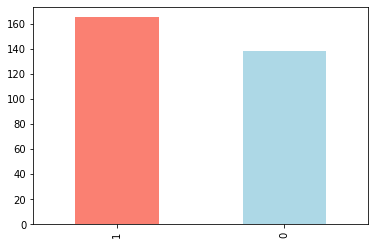

In [7]:
df.target.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

We notice that our dataset is tilted towards having more men than women. 

In [12]:
# Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


**Based on our existing dataset**

We notice that 72 out of all the women (96) have heart disease. Just by looking at this, we can say that if the patient is a women, there is roughly a 75% chance that she has the heart disease.

The ratio of men having and not having the heart disease is similar to ~50%.

If we take the average, (75+50)/2 (dividing by 2 only because dataset is relatively balanced), roughly 62.5% of the patients have the disease.

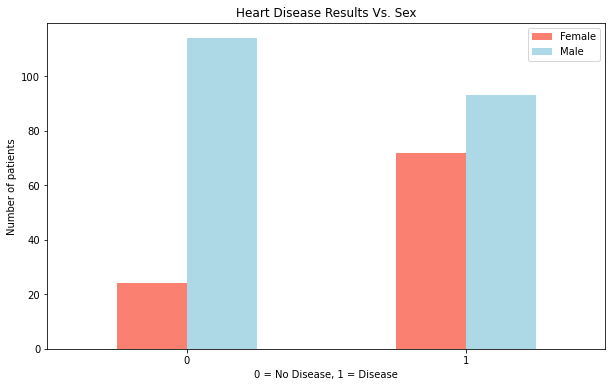

In [13]:
# Creating a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue'])

plt.title('Heart Disease Results Vs. Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Number of patients')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate

In [14]:
df.thalach

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

In [15]:
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

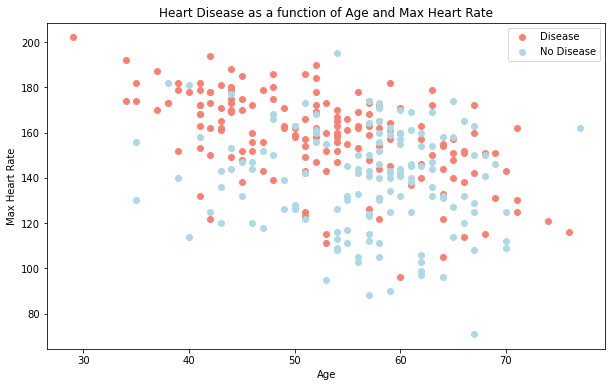

In [16]:
# Creating a plot
plt.figure(figsize=(10,6))

# Scatter graph with disease-positive patients
plt.scatter(df.age[df.target==1],
            df.thalach[df.target == 1],
            color='salmon')

# Scatter graph with disease-negative patients
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color='lightblue')

# Making graph more readable
plt.title('Heart Disease as a function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

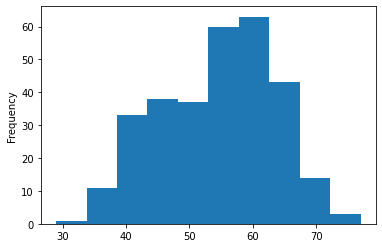

In [17]:
# Check the distribution of age
df.age.plot.hist();

### Heart Disease per Type of chest pain

3. cp - chest pain type (4 values)
    * 0: Typical angina: chest pain related to decreased blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


No disease: disease ratio is almsot 1 : 4 in case of type 2 pain (which is non-anginal, not related to heart)
        
        
This is something we would like to discuss with a subject matter expert on how accurate the data is? Is it really that common?
Why? Because it doesn't make sense to us as patients feeling pain not related to heart are actually suffering from heart disease?

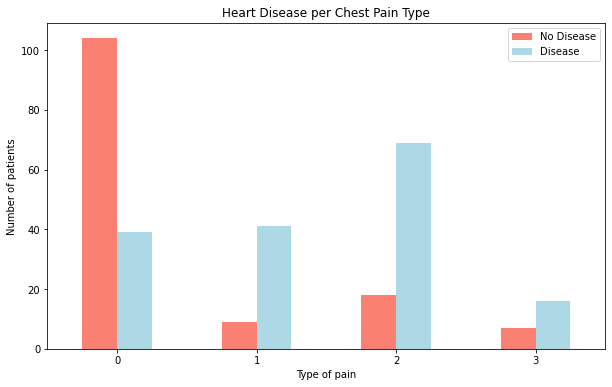

In [19]:
# Make the relation more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])

# Add communication
plt.title('Heart Disease per Chest Pain Type')
plt.xlabel('Type of pain')
plt.ylabel('Number of patients')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation = 0);

In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


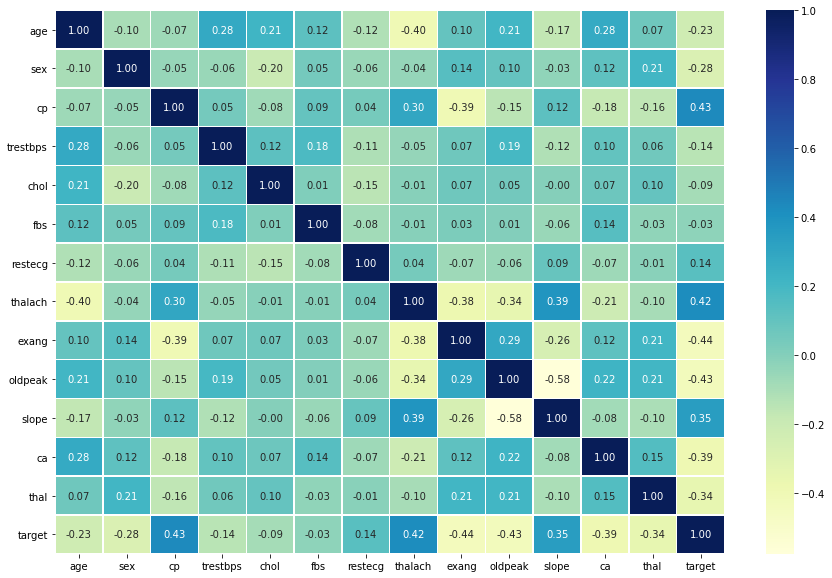

In [21]:
# Making the correlation matrix visual
conf_mat = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(conf_mat,
                 annot=True,
                 fmt= ".2f",
                 cmap="YlGnBu",
                 linewidths=0.5)

## Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Splitting our data into features and labels
np.random.seed(42)
X = df.drop('target', axis = 1)
y = df.target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now that we have our data split and ready, its time to train it on a machine learning model.

We're going to try 3 models:
1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier

In [26]:
# Create a dict of models
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

In [27]:
# Create a function to fit & score the model
def fit_and_score(models, X_train, X_test, y_train, y_test) : 
    """
    Function to fit and score machine learning models.
    models : dict of machine learning models
    X_train : training dataset (no lables)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through the models
    for name, model in models.items():
        
        # Fit the data to the models
        model.fit(X_train, y_train)
        # Score the model and save it's value to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [28]:
model_scores = fit_and_score(models= models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

C:\Users\harsh\Desktop\stuff\Machine Learning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

In [29]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [30]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


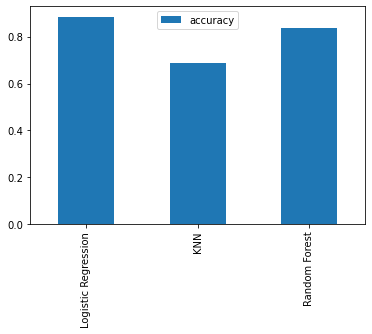

In [31]:
model_compare.T.plot.bar();

Now we have ourselves a baseline model..

And we know a model's first predictions are not something on which our next steps should be based. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

 ## Hyperparameter Tuning (By Hand)

In [32]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different valuues for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


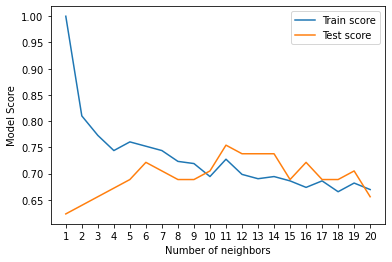

In [35]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

This is where we strike off the KNN algo from our list of classifiers to go with. This is because we need better results

## Hyperparameter Tuning with RandomizedSearchCV

We're going to tune:
* Logistic Regression
* Random Forest Classifier

In [36]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

Now we've got our hyperparameter grids set up for each of our models, let's tune them using RandomizedSearchCV()

In [37]:
# Tune LogisticRegression
np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [39]:
# Evaluate the randomized search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression, lets do the same for RandomForestClassifier

In [40]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   57.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression Model provides the best scores so far, we'll try to improve them again using GridSearchCV

In [43]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ['liblinear']}

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
# Evaluate teh grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our machine learning classifier using other metrics, beyond accuracy

* ROC curve and AUC
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

And it would be great if cross validation be used wherever possible!

To make comparisons and evaluate our trained model, first we need to make predictions.

In [46]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

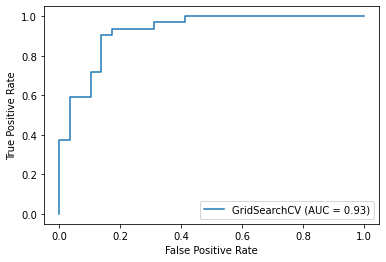

In [49]:
# Plot ROC curve and calculate and AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [50]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


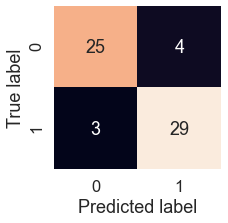

In [51]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go horizontally
    plt.ylabel("True label") # true labels go vertically
    
plot_conf_mat(y_test, y_preds)

Now that we have our ROC curve, AUC metric and confusion matrix, it is time for us to take a look at classification report and cross-validated precision, recall and f1 scores

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Though the classification report has a measure of precision, recall and f1-scores, these scores are not cross-validated and are evaluated on just one single test split.

### Calculate evaluating metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1 score of our model using cross validation and we will be able to do so by using `cross_val_score()`

In [53]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418,
                         solver = 'liblinear')

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [57]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv = 5,
                               scoring = "precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [58]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv = 5,
                               scoring = "recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [59]:
# Cross-validated f1 score
cv_f1 = cross_val_score(clf,
                               X,
                               y,
                               cv = 5,
                               scoring = "f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

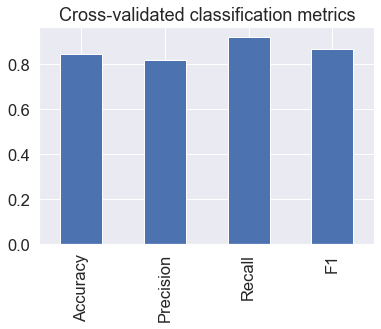

In [60]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1},
                          index = [0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                      legend = False);

### Feature Importance

Feature importance is a way of asking **"which features contributed the most for the outcomes of the model? How did they contribute?"**

Finding feature importance is different for each machine learning model.

In [61]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C= 0.20433597178569418,
                         solver = 'liblinear')

clf.fit(X_train, y_train);

In [62]:
# Check coef_ 
# (coefficient of how each independent variables in X data set contributes to the label)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [63]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:title={'center':'Feature Importance'}>

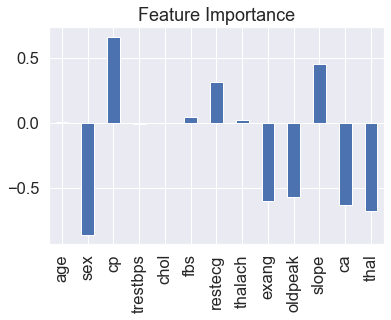

In [65]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False)

Look at the heatmap plotted earlier during our EDA, and observe the correlation of various features with the target variables. 

Now come down and look at the plot right above this cell, and compare the values of `clf.coef()`. These values have come from building a machine learning model which has found patterns in the data and it's telling us how it contributes or correlates to our target variable. **This is part of Model Driven EDA**.

We see in this plot that sex has a fairly negative coefficient (has a negative correlation). If this is true, as value of sex increases, the number of cases of heart disease should get lesser. Let's find out what is actually the case

In [66]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [67]:
72/24

3.0

In [68]:
93/114

0.8157894736842105

It is clear from the above crosstab that when sex increases, the value of target column decreases. When we say the value of target column, we mean the ratio of the patients who have and who do not have the disease.


For females, the disease:no-disease ratio = 3:1

For males, the disease:no-disease ratio = 0.8:1 (roughly)

In [69]:
# Let us now compare slope
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


There is a definite upward trend. Let us look into our data dictionary and see what different values of slope actually are:
    
    
slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typically healthy heart)
* 2: Downslopings: signs of unhealthy heart


As we see, an increase in value of slope means that the patient is showing signs of unhealthy heart. This means as the value of slope increases, the chances of patient having heart-disease also increase. 

This is also visible in our .coef_ plot where slope has a positive coefficient value.

## 6. Experimentation

This is something we did not do explicitly but we were experimenting throughout the modelling step, trying out different models, seeing which worked and which did not, tuning, etc etc

IF you haven't hit your evluation metric yet (in our case, the accuracy is not at 95%), ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)

IF your model is good enough (you've hit your evaluation metric) how would you export it and share it with others?

## Going back to modelling

Since we didn't reach the desired % accuracy, we'll try again with different hyperparameters for LogisticRegression

In [79]:
# Make new grid for GridSearchCV
log_reg_grid = {'C' : np.logspace(-10, 10, 30),
                'solver' : ['liblinear'],
                }

# Instantiate GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          log_reg_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 4.89390092e-10, 2.39502662e-09, 1.17210230e-08,
       5.73615251e-08, 2.80721620e-07, 1.37382380e-06, 6.72335754e-06,
       3.29034456e-05, 1.61026203e-04, 7.88046282e-04, 3.85662042e-03,
       1.88739182e-02, 9.23670857e-02, 4.52035366e-01, 2.21221629e+00,
       1.08263673e+01, 5.29831691e+01, 2.59294380e+02, 1.26896100e+03,
       6.21016942e+03, 3.03919538e+04, 1.48735211e+05, 7.27895384e+05,
       3.56224789e+06, 1.74332882e+07, 8.53167852e+07, 4.17531894e+08,
       2.04335972e+09, 1.00000000e+10]),
                         'solver': ['liblinear']},
             verbose=True)

In [80]:
gs_log_reg.best_params_

{'C': 85316785.24172848, 'solver': 'liblinear'}

In [81]:
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In [83]:
# comparing with the previous best
clf.score(X_test, y_test)

0.8852459016393442

We do not see any improvement. Hence, we'll move on and try other classifiers first

In [85]:
# gradient boosting for classification in scikit-learn

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X, y)

Accuracy: 0.807 (0.069)


GradientBoostingClassifier()